# LDA 

**
Latent Dirichlet allocation (LDA) is a generative topic model to find latent topics in a text corpus. The model assumes that each document is a mixture over an underlying set of topics, and each topic is a mixture over a set of word probability.
**

In [4]:
import os
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
import gensim
import pyLDAvis.gensim as gensimvis
import pyLDAvis

## 1. import data

In [5]:
dir = '/Users/Dai/Desktop/lyrics_D_to_L'

In [6]:
# list all songs
list_of_files = []

for root, dirs, files in os.walk(dir):
    for file in files:
        if file.endswith(".txt"):
            list_of_files.append(os.path.join(root, file))       

In [8]:
len(list_of_files)

10085

## 2. remove stop words and stem the words

In [14]:
from stop_words import get_stop_words

en_stop = get_stop_words('en')
sp_stop = get_stop_words('spanish')

from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

In [15]:
tokenizer = RegexpTokenizer(r'\w+\'\w|\w+')
oth_stop = ['verse', 'chorus']
texts = []
n = 0
for i in range(len(list_of_files)):
    with open(list_of_files[i], 'r') as f:
        song = f.read()
        
        # clean and tokenize document string
        raw = song.lower()
        tokens = tokenizer.tokenize(raw)
        
        # remove stop words from tokens
        stopped_tokens_0 = [i for i in tokens if not i in en_stop + sp_stop]
        stopped_tokens = [i for i in stopped_tokens_0 if len(i) >= 3]
        
        # stem tokens
        try:
            stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
            texts.append(stopped_tokens)
        except:
            n = n + 1
            continue
        
print n

/Users/Dai/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


1374


## 3. choose the number of clusters

**
We increased the number of topics from 1 to 100, and used the perplexity to measure the performance of the LDA model. The result shows that as the number of topic increases, the perplexity decreases, indicating the model interprets the model better. However, the decreasing rate decreases as n goes higher. Therefore, we chose n=25 as a balance of accuracy and model complexity.
**

In [16]:
import numpy as np
from sklearn.cross_validation import KFold

/Users/Dai/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
random = np.random.choice(corpus, 3000)

In [19]:
perplexity = []
for i in range(1, 100):
    kf = KFold(n = 3000, n_folds=5)
    for train_index, test_index in kf:
        p = []
        ldamodel = gensim.models.ldamodel.LdaModel(random[train_index], num_topics=i, id2word = dictionary)
        p.append(ldamodel.log_perplexity(random[test_index]))
    x = np.mean(p)
    perplexity.append(x)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
snn.set_style('whitegrid')
sns.set_context('poster')

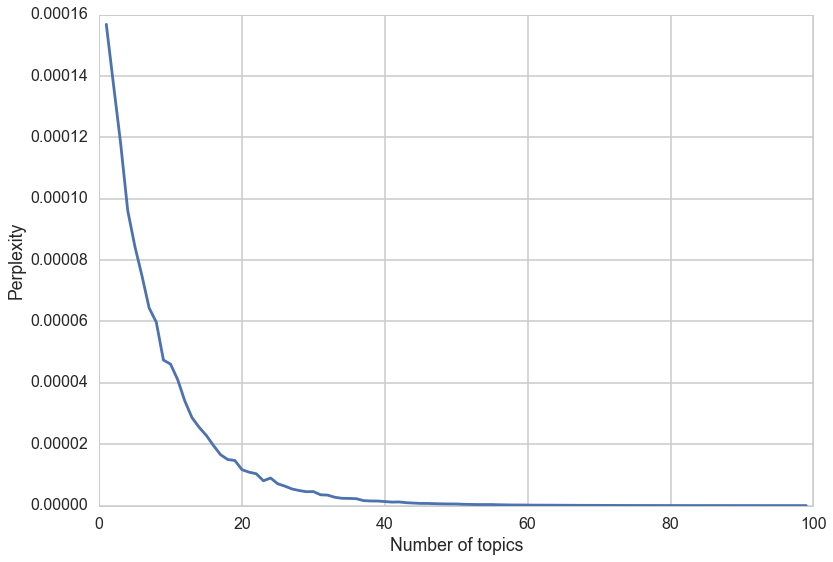

In [145]:
plt.plot(range(1,100), np.exp(perplexity))
plt.xlabel('Number of topics')
plt.ylabel('Perplexity')

## 4. Visulize the result (n=25)

In [25]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=25, id2word = dictionary)

In [26]:
ldamodel.print_topics(num_topics=25, num_words=4)

[(0, u'0.043*"hey" + 0.020*"like" + 0.007*"now" + 0.006*"must"'),
 (1, u'0.012*"like" + 0.006*"man" + 0.006*"yeah" + 0.006*"know"'),
 (2, u'0.037*"love" + 0.028*"know" + 0.015*"can" + 0.014*"just"'),
 (3, u'0.026*"like" + 0.012*"little" + 0.012*"hot" + 0.010*"eyes"'),
 (4, u'0.054*"blah" + 0.047*"hamilton" + 0.021*"magic" + 0.009*"pity"'),
 (5, u'0.037*"christmas" + 0.023*"lead" + 0.016*"merry" + 0.009*"golden"'),
 (6, u'0.018*"got" + 0.016*"like" + 0.015*"just" + 0.015*"gonna"'),
 (7, u'0.020*"little" + 0.012*"body" + 0.012*"like" + 0.012*"round"'),
 (8, u'0.018*"home" + 0.017*"just" + 0.016*"looking" + 0.014*"you\'r"'),
 (9, u'0.009*"roses" + 0.008*"will" + 0.008*"like" + 0.008*"dreaming"'),
 (10, u'0.015*"falling" + 0.014*"love" + 0.010*"wild" + 0.009*"ice"'),
 (11, u'0.114*"wanna" + 0.053*"run" + 0.017*"nelly" + 0.013*"like"'),
 (12, u'0.018*"tonight" + 0.018*"feel" + 0.013*"like" + 0.013*"beat"'),
 (13, u'0.036*"come" + 0.013*"let" + 0.012*"love" + 0.011*"like"'),
 (14, u'0.015*"y

In [27]:
vis_data = gensimvis.prepare(ldamodel, corpus, dictionary)

In [28]:
pyLDAvis.display(vis_data)

In [30]:
pyLDAvis.save_html(vis_data, 'lda1.html')

**We got some very interesting result from LDA clustering under n=25. For example, we have clusters related to “party” with the most relevant words “dance”, “party”, “boys”, “hot”, “hey”, etc, and topics related to “social issues” with the most relevant words “black”, “war”, “children”, “dead”, “lives”, etc. It seems that we can get a quite good class of these special topics even with unsupervised learning method. However, topic like “love” tend to include multiple emotions, both happy and sad. These results suggest that the information encoded with lyric data might be more power for predicting theme rather than emotion.**